In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('real_estate_price_size.csv')

In [7]:
data

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46
5,245050.280,575.19
6,265129.064,570.89
7,175716.480,620.82
8,331101.344,682.26
9,218630.608,694.52


In [9]:
from sklearn import preprocessing

x_scaled = preprocessing.scale(data)
x_scaled

array([[-0.75621141, -0.70816415],
       [-0.83098579, -0.66387316],
       [-0.13908647, -1.23371919],
       [ 1.42131906,  2.19844528],
       [ 2.17026934,  1.42498884],
       [-0.61617272, -0.937209  ],
       [-0.35427155, -0.95171405],
       [-1.52054038, -0.78328682],
       [ 0.50624953, -0.57603328],
       [-0.96078238, -0.53467702],
       [-0.16610306,  0.69939906],
       [ 2.64120784,  3.33780001],
       [-1.00198088, -0.53467702],
       [ 1.64954949,  0.52699137],
       [ 1.98136758,  1.51100715],
       [ 1.9293182 ,  1.77668568],
       [-0.57329398, -0.54810263],
       [-0.75798514, -0.77276222],
       [-0.87180655, -0.58004747],
       [ 0.09296888,  0.58943055],
       [-0.31519249, -0.78365788],
       [-1.57168777, -1.02322731],
       [ 1.56889345,  1.19557293],
       [-1.41954309, -1.12884431],
       [-1.62057516, -1.10378093],
       [ 0.91606067,  0.84424715],
       [-0.26734526, -0.95171405],
       [ 1.49432055,  1.62279723],
       [ 0.07136156,

In [33]:
kmeans_scaled = KMeans(4)
kmeans_scaled.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
cluster_scaled = data.copy()

cluster_scaled['Cluster_Prediction'] = kmeans_scaled.fit_predict(x_scaled)

Text(0.5, 0, 'Size')

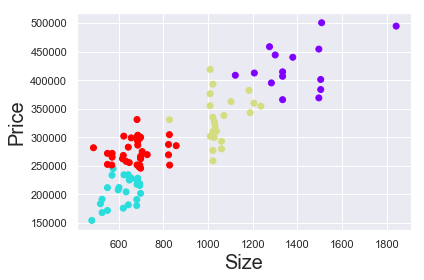

In [35]:
plt.scatter(cluster_scaled['size'],cluster_scaled['price'],c = cluster_scaled['Cluster_Prediction'],cmap ='rainbow')
plt.ylabel('Price',fontsize = 20)
plt.xlabel('Size',fontsize = 20)

## Elbow Method

In [26]:
wcss = []

cl_num = 10
for i in range(1,cl_num):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[200.0,
 61.17127438139964,
 38.63128054840256,
 25.688588827012765,
 19.672121798594844,
 16.416049540795868,
 13.378537771841629,
 11.67071465902222,
 10.054354701024934]

Text(0, 0.5, 'Within-cluster sum of squares')

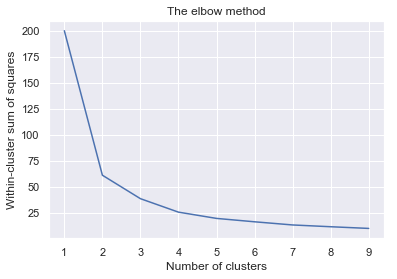

In [28]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters,wcss)
plt.title("The elbow method")
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')

## Heatmap of Scaled Data

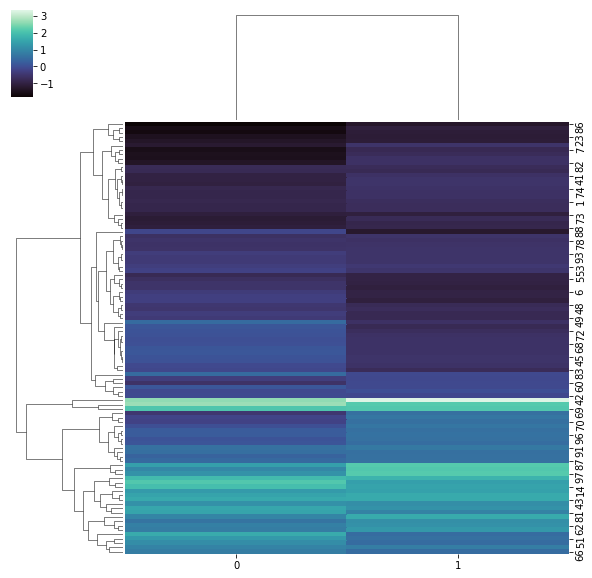

In [11]:
sns.clustermap(x_scaled,cmap='mako')